特徵：在原始資料集中有變化性，才能稱為特徵，透過這些特徵能把目標做清楚的分類與預測，才能稱為好的特徵。

特徵工程可以分成兩大類，包含衍生和添加：

衍生：以既有收集到的資料為基礎，透過探索性資料分析（EDA），深入理解特徵與目標變數之間的關係後，進行數據轉換、組合或提取，進而產生更具代表性的新特徵。

添加：超越現有資料範圍，主動引入外部資訊（如開放資料、商業數據、地理氣候等）來豐富模型輸入。這類特徵往往是模型效能提升的關鍵，但在實務中容易被忽略。

運用四分位數、全距、百分位數、標準差、變異數，分析連續型資料的變異性。
運用類別數量統計，分析離散型資料資料的變異性。

中低相關的資料，我們怎麼更進一步萃取出可用特徵？
1. 指示器變量(Indicator)
2. 資料組合(Combination)
3. 資料重新定義(Reshape)


指示器變量(Indicator)

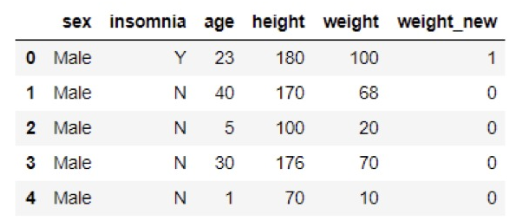

In [ ]:
# 運用 apply function  做變數轉換
data['weight_new']=data['weight'].apply((lambda x: 1 if x >=100 else 0))
display(data.head(5))

資料組合(Combination)

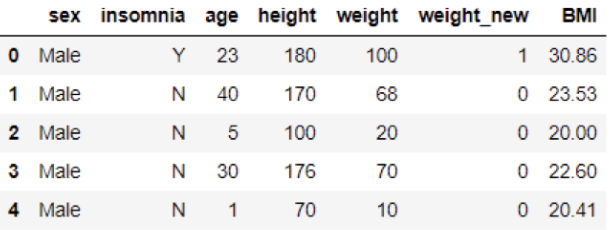

In [ ]:
data['BMI']=round(data['weight']/data['height']/data['height']*100*100,2)
display(data.head(5))

資料重新定義(Reshape)
1. 資料收集時間長度調整：將日資料彙整為月資料，或將週銷售數據轉換為季度平均
2. 數值到分類的映射： 將連續數值轉為具意義的區間，例如將收入分為「低」、「中」、「高」三類
3. 合併稀疏分類：發現年齡中，某一個年齡層人數偏少，可以做合併的動作。
4. 表達類別型資料的距離：定義類別資料距離：比如年齡資料，兒童、青少年與成年可轉換為 1，2，3。
5. 創造虛擬資料：這取決[與]於[更新]你選擇的機器學習算法，如果是以距離來量測資料的遠近，則需將類別特徵轉換到虛擬變量中去，稱作 one-hot encoding。

In [ ]:
## 將數值資料轉換成類別型資料。
# 運用 apply function  做變數轉換
def age_map(x): 
    if(x<=12):
        return('child')
    else: 
        if(x<=18):
            return('teens')
        else:
            return('adult')
    
data['age_category']=data['age'].apply(age_map)

display(data)

In [ ]:
Python - 合併稀疏分類

## 合併稀疏分類
contTable = pd.crosstab(data['age_category'], data['insomnia'])
contTable # 有兩個零的存在，太過稀疏，有時候會將 age_category中的 child  和 teens 合併，但如果最後應用端要把 age 分成三種類型的話，就不會合併

##現在假設要合併的話可以怎麼做?
#產生一個新的 mapping function 然後做調整
def age_map_2(x): 
    if(x<=18):
        return('child_teens')
    else:
        return('adult')
    
data['age_category']=data['age'].apply(age_map_2)

display(data)

In [ ]:
Python - 定義類別資料距離
#定義類別資料距離
data['age_category']=data['age'].apply(age_map)
size_mapping = {'child':1, 'teens':2, 'adult':3}
data['age_conti'] = data['age_category'].map(size_mapping)
display(data)

In [ ]:
Python - 創建虛擬資料
#透過 prefix 來調整欄位名稱
b = data[['age_category']]
dummy=pd.get_dummies(b, columns=['age_category'], prefix=['age'])
#資料合併
data=pd.concat([data,dummy],axis=1)
display(data)